In [1]:
import numpy as np
import pandas as pd

<div class="alert alert-block alert-success">
<b>Data Preparation</b> 
</div>

In [2]:
#read it with Pandas
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [38]:
data.columns = data.columns.str.lower().str.replace(" ","_")
data.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [39]:
string_cols = list(data.dtypes[data.dtypes == "object"].index)

for col in string_cols:
    data[col] = data[col].str.lower().str.replace(" ", "_")

<div class="alert alert-block alert-success">
<b>Exploratory Data Analysis</b> 
</div>

<div class="alert alert-block alert-warning">
<b>Distribution of price</b>
</div>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

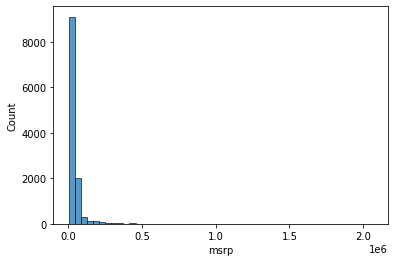

In [41]:
sns.histplot(data.msrp, bins = 50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

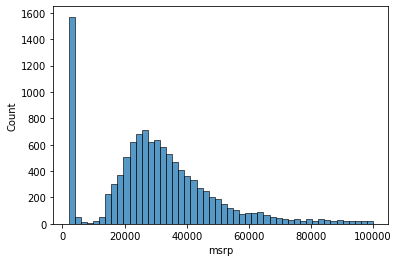

In [42]:
sns.histplot(data.msrp[data.msrp < 100000], bins = 50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

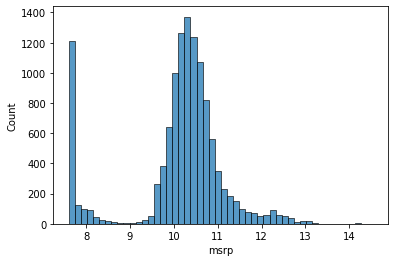

In [43]:
# remove the tail 

price_logs = np.log1p(data.msrp)
sns.histplot(price_logs,bins = 50)

<div class="alert alert-block alert-warning">
<b>Missing values</b>
</div>

In [44]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<div class="alert alert-block alert-success">
<b>Setting Up The Validation Framework</b> 
</div>

In [45]:
n = len(data)

n_val = int(n * 0.2)
n_test =  int(n * 0.2)
n_train = n - (n_val + n_test)

In [46]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [47]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [48]:
y_train = np.log1p(data_train.msrp.values)
y_val = np.log1p(data_val.msrp.values)
y_test = np.log1p(data_test.msrp.values)

In [49]:
#To avoid accidentally using the target variable later, let’s remove it from the dataframes:

del data_train['msrp']
del data_val['msrp']
del data_test['msrp']

<div class="alert alert-block alert-success">
<b>Linear Regression</b> 
</div>

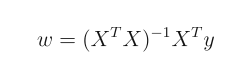

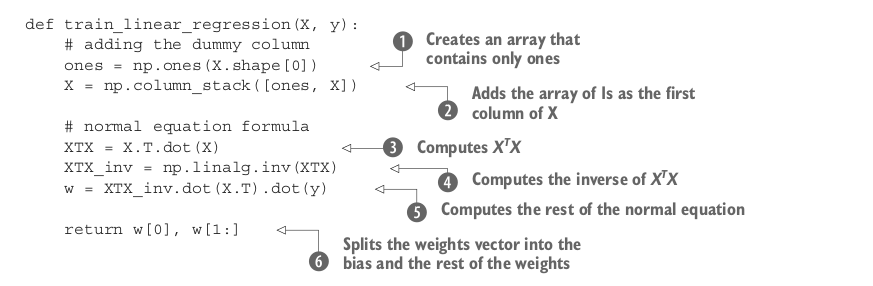

In [82]:
def train_linear_regression(X, y):
    
    #adding the dummy col
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    #normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

<div class="alert alert-block alert-success">
<b>Root Mean Squared Error — RMSE</b> 
</div>

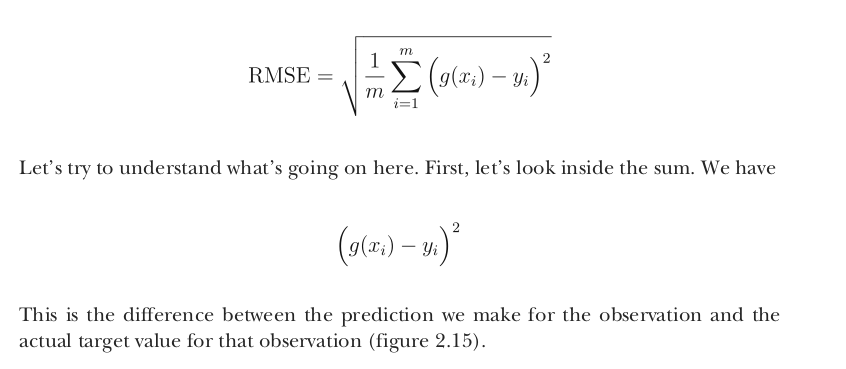

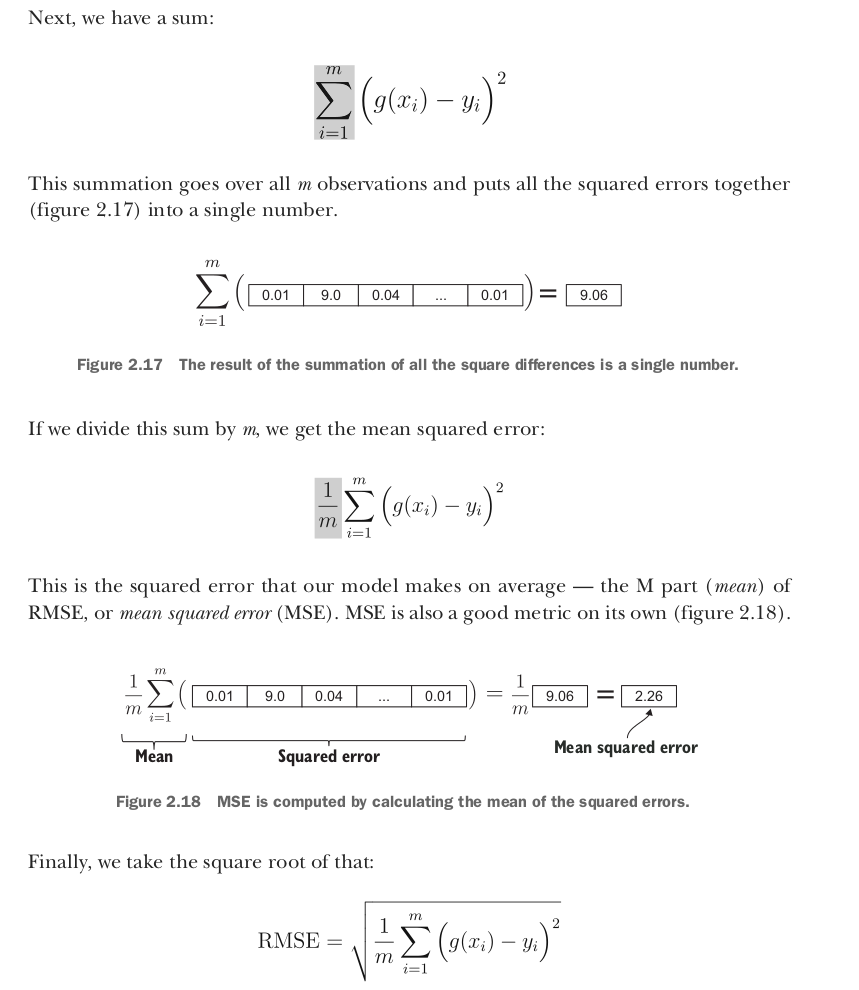

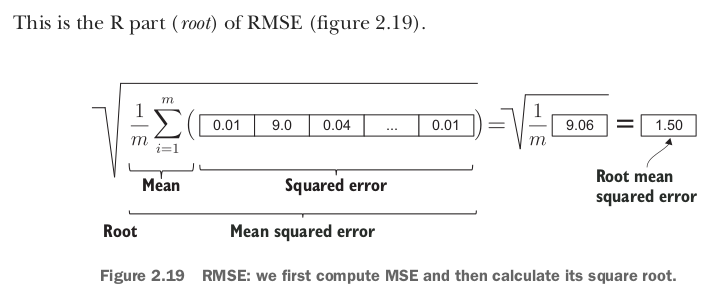

In [83]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

<div class="alert alert-block alert-success">
<b>Car Price Baseline Model</b> 
</div>

In [72]:
base = ['engine_cylinders', 'engine_hp', 'highway_mpg', 'city_mpg', 'popularity']


In [85]:
def prepare_X(data):
    data_num = data[base]
    data_num = data_num.fillna(0)
    X = data_num.values
    
    return X

In [86]:
X_train = prepare_X(data_train)

w0, w = train_linear_regression(X_train, y_train)

#get the prediction
y_pred = w0 + X_train.dot(w)

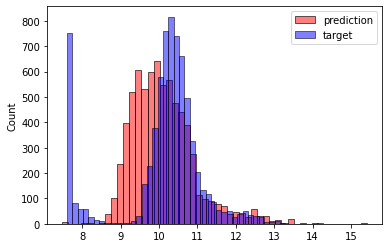

In [87]:
sns.histplot(y_pred, label='prediction', color='red', alpha = 0.5, bins = 50)
sns.histplot(y_train, label='target', color='blue',  alpha = 0.5, bins = 50)
plt.legend()

In [88]:
rmse(y_train, y_pred)

0.7554192603920132

<div class="alert alert-block alert-success">
<b>Validating the model</b> 
</div>

In [90]:
X_val = prepare_X(data_val)

w0, w = train_linear_regression(X_train, y_train)

#get the prediction
y_pred = w0 + X_val.dot(w)

In [91]:
rmse(y_val, y_pred)

0.7616530991301554

<div class="alert alert-block alert-success">
<b>Feature Engineering</b> 
</div>

In [93]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()
    
    data['age'] = 2017 - data.year
    features.append('age')
    
    data_num = data[features]
    data_num = data_num.fillna(0)
    X = data_num.values
    
    return X

In [94]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058302

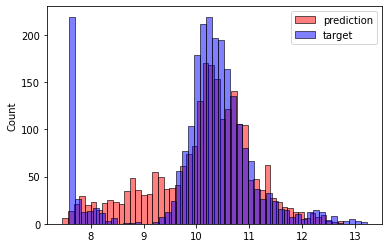

In [95]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

<div class="alert alert-block alert-success">
<b>Categorical Variables</b> 
</div>

In [101]:
data['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [102]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()
    
    data['age'] = 2017 - data.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        data[feature] = (data['make'] == v).astype(int)
        features.append(feature)

    
    data_num = data[features]
    data_num = data_num.fillna(0)
    X = data_num.values
    
    return X

In [103]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred))

validation: 0.507603884955606


<div class="alert alert-block alert-success">
<b>Regularization</b> 
</div>

In [107]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()
    
    data['age'] = 2017 - data.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        data[feature] = (data['make'] == v).astype(int)
        features.append(feature)
        
    #type variable
    for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        data[feature] = (data['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    #transmission variable
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        data[feature] = (data['transmission_type'] == v).astype(int)
        features.append(feature)
    
    #number of driven wheels
    for v in ['front_wheel_drive', 'rear_wheel_drive','all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        data[feature] = (data['driven_wheels'] == v).astype(int)
        features.append(feature)
        
    
    #market category
    for v in ['crossover', 'flex_fuel', 'luxury','luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        data[feature] = (data['market_category'] == v).astype(int)
        features.append(feature)
        
    #Encodes the size
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        data[feature] = (data['vehicle_size'] == v).astype(int)
        features.append(feature)

    #the style
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']:
        feature = 'is_style_%s' % v
        data[feature] = (data['vehicle_style'] == v).astype(int)
        features.append(feature)
    
    data_num = data[features]
    data_num = data_num.fillna(0)
    X = data_num.values
    
    return X

In [108]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [112]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred))

validation: 0.4602267628007441


In [115]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(data_test)
y_pred = w0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.4602394963209913
test: 0.45718136794721864


<div class="alert alert-block alert-success">
<b>Using the model</b> 
</div>

In [118]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
}

data_test = pd.DataFrame([ad])
X_test = prepare_X(data_test)

y_pred = w0 + X_test.dot(w)

suggestion = np.expm1(y_pred)
suggestion

array([28294.13592901])